In [1]:
#importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the training data
rd = pd.read_csv("regression_train.csv")
rd.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,p,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,M,p,42.606833
2,8,258,A,19.220830,2817.0,1.0,8.727214,1.0,M,p,85.625961
3,4,147,A,15.752732,1948.0,1.0,6.078818,1.0,M,p,53.656277
4,5,230,H,10.195407,1336.0,1.0,4.749185,0.0,M,p,64.925051


In [3]:
#Performing EDA

In [4]:
rd.shape

(10000, 11)

In [5]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   10000 non-null  int64  
 1   data2   10000 non-null  int64  
 2   data3   10000 non-null  object 
 3   data4   10000 non-null  float64
 4   data5   9999 non-null   float64
 5   data6   9997 non-null   float64
 6   data7   9998 non-null   float64
 7   data8   9999 non-null   float64
 8   data9   9999 non-null   object 
 9   data10  9999 non-null   object 
 10  output  9999 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 859.5+ KB


In [6]:
rd.dropna(axis=0, inplace = True)

In [7]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   9997 non-null   int64  
 1   data2   9997 non-null   int64  
 2   data3   9997 non-null   object 
 3   data4   9997 non-null   float64
 4   data5   9997 non-null   float64
 5   data6   9997 non-null   float64
 6   data7   9997 non-null   float64
 7   data8   9997 non-null   float64
 8   data9   9997 non-null   object 
 9   data10  9997 non-null   object 
 10  output  9997 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 937.2+ KB


In [8]:
#Converting Categorical Data into Numerical Data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
rd['data3'] = le.fit_transform(rd['data3'])
rd['data9'] = le.fit_transform(rd['data9'])
rd['data10'] = le.fit_transform(rd['data10'])

rd.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,2,14.451155,1139.0,1.0,9.302908,1.0,1,0,86.108947
1,1,108,7,14.207448,1656.0,1.0,7.220130,0.0,1,0,42.606833
2,8,258,0,19.220830,2817.0,1.0,8.727214,1.0,1,0,85.625961
3,4,147,0,15.752732,1948.0,1.0,6.078818,1.0,1,0,53.656277
4,5,230,7,10.195407,1336.0,1.0,4.749185,0.0,1,0,64.925051


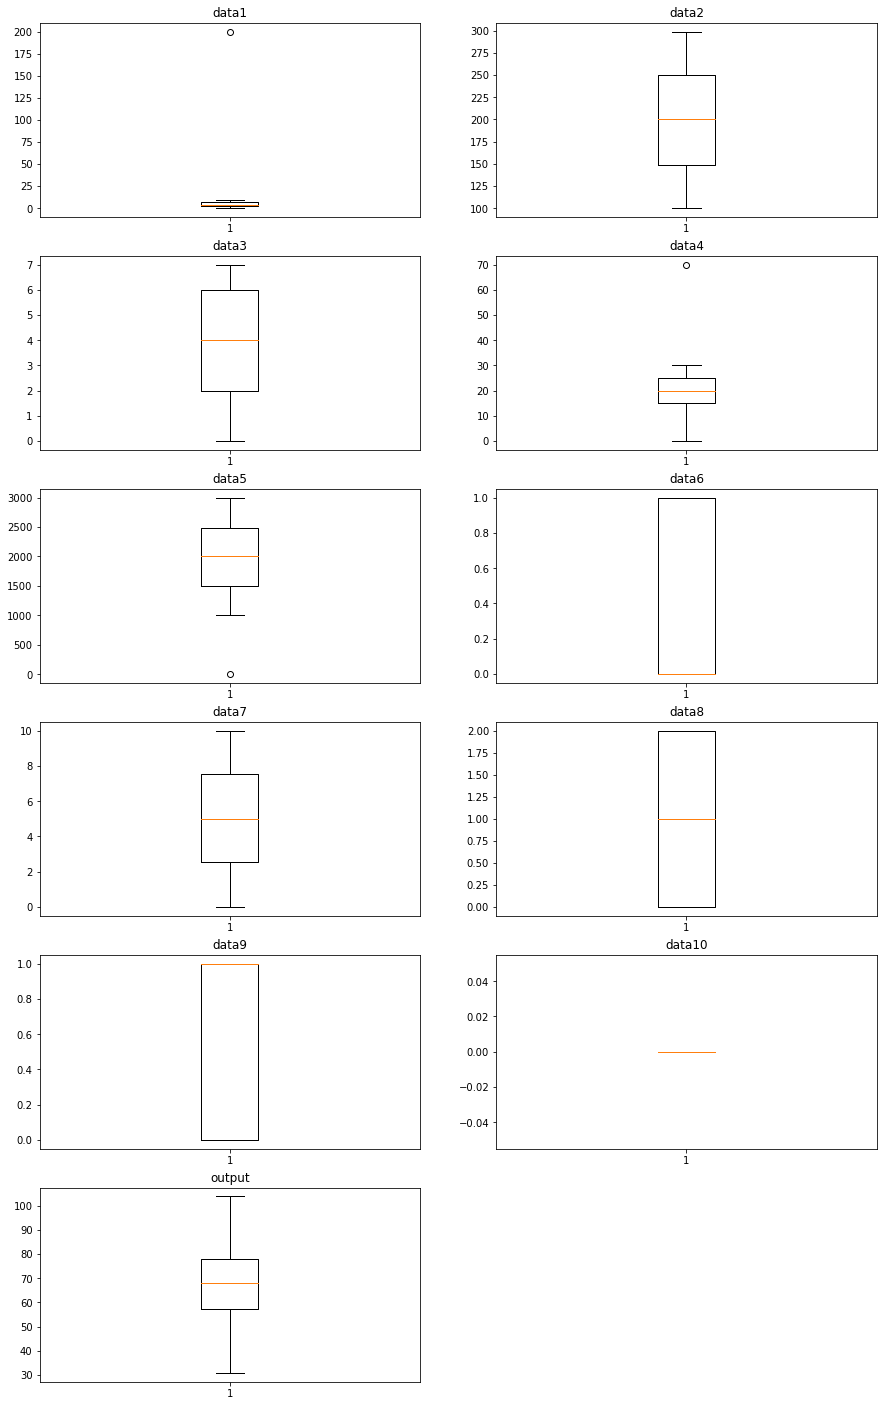

In [9]:
#Using BoxPlots to check For Any Outliers
plt.figure(figsize = (15,25))
count=1
for col in rd:
    plt.subplot(6,2,count)
    plt.boxplot(rd[col])
    plt.title(col)
    count+=1
        
plt.show()

In [10]:
#Finding The Positions of Outliers
for col in rd:
    Q1 =  rd[col].quantile(0.25)
    Q3 = rd[col].quantile(0.75)
    IQR = Q3 - Q1
    print (col, "--> " , rd[(rd[col] < Q1-1.5*IQR ) | (rd[col] > Q3+1.5*IQR)][col])

data1 -->  18    200
Name: data1, dtype: int64
data2 -->  Series([], Name: data2, dtype: int64)
data3 -->  Series([], Name: data3, dtype: int32)
data4 -->  33    70.002
Name: data4, dtype: float64
data5 -->  46    4.0
Name: data5, dtype: float64
data6 -->  Series([], Name: data6, dtype: float64)
data7 -->  Series([], Name: data7, dtype: float64)
data8 -->  Series([], Name: data8, dtype: float64)
data9 -->  Series([], Name: data9, dtype: int32)
data10 -->  Series([], Name: data10, dtype: int32)
output -->  Series([], Name: output, dtype: float64)


In [11]:
#Removing Outliers
rd.drop([18,], inplace = True)
rd.drop([33,], inplace = True)
rd.drop([44,], inplace = True)

In [12]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   9994 non-null   int64  
 1   data2   9994 non-null   int64  
 2   data3   9994 non-null   int32  
 3   data4   9994 non-null   float64
 4   data5   9994 non-null   float64
 5   data6   9994 non-null   float64
 6   data7   9994 non-null   float64
 7   data8   9994 non-null   float64
 8   data9   9994 non-null   int32  
 9   data10  9994 non-null   int32  
 10  output  9994 non-null   float64
dtypes: float64(6), int32(3), int64(2)
memory usage: 819.8 KB


In [13]:
#Dividing the training data into X and Y
X = rd.iloc[:,:-1].values
y = rd.iloc[:,-1].values

In [14]:
X.shape

(9994, 10)

In [15]:
y.shape

(9994,)

In [16]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
#Splitting the data into Train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.01,random_state = 0)

In [18]:
# Building Model
from sklearn.linear_model import LinearRegression

In [19]:
regressor = LinearRegression()

In [20]:
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
#Y-prediction
y_pred = regressor.predict(X_test)
y_pred

array([49.84930119, 54.88169949, 51.08812371, 71.47684637, 66.05177127,
       86.36294672, 66.84389458, 76.64140092, 83.01109549, 79.66692387,
       43.87537159, 43.95042648, 72.15285714, 81.41104263, 65.60904871,
       78.85827862, 82.15313424, 72.36598192, 58.17510233, 66.40955017,
       90.6194539 , 59.63015899, 60.09848952, 70.60531826, 62.26494415,
       56.91490024, 43.95830874, 72.0842095 , 59.291241  , 67.19509374,
       68.63708002, 58.46780384, 86.96349627, 55.12207268, 81.41791019,
       50.53891163, 56.99101628, 54.62104269, 49.17073381, 79.93005824,
       43.53006318, 62.84373601, 51.82770404, 60.74814914, 76.99757658,
       66.85355629, 57.40937983, 47.52387283, 74.07583051, 77.73677976,
       59.98030741, 62.86557807, 75.15489475, 84.80082793, 62.4929379 ,
       76.96473685, 87.53239048, 77.50371601, 60.39609362, 79.23848463,
       83.88543654, 58.30339333, 69.18754434, 80.45192444, 63.88364511,
       56.99190007, 66.13982874, 73.27395547, 74.68344895, 88.20

In [22]:
#Checking the score and accuracy 
from sklearn.metrics import r2_score

In [23]:
r2_score(y_test,y_pred)

0.9999994727610332

In [24]:
#Importing TEST DATASET to run on Model
Test_Data = pd.read_csv("regression_test.csv")

In [25]:
Test_Data.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10
0,7,195,A,29.038043,2725,1,6.145731,2,M,p
1,9,109,F,20.221431,1184,1,9.334184,2,M,p
2,0,126,C,26.477532,2975,1,9.021806,1,M,p
3,2,209,E,13.445450,1067,1,1.814993,0,M,p
4,5,268,B,25.065894,1336,1,1.639130,1,M,p


In [26]:
#Copying the Data For changing Purpose
Testcopy = Test_Data.copy()

In [27]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   10000 non-null  int64  
 1   data2   10000 non-null  int64  
 2   data3   10000 non-null  object 
 3   data4   10000 non-null  float64
 4   data5   10000 non-null  int64  
 5   data6   10000 non-null  int64  
 6   data7   10000 non-null  float64
 7   data8   10000 non-null  int64  
 8   data9   10000 non-null  object 
 9   data10  10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [28]:
#Converting Categorical Data to Numerical Data. if any..
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

Test_Data['data3'] = le.fit_transform(Test_Data['data3'])
Test_Data['data9'] = le.fit_transform(Test_Data['data9'])
Test_Data['data10'] = le.fit_transform(Test_Data['data10'])

Test_Data.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10
0,7,195,0,29.038043,2725,1,6.145731,2,1,0
1,9,109,5,20.221431,1184,1,9.334184,2,1,0
2,0,126,2,26.477532,2975,1,9.021806,1,1,0
3,2,209,4,13.445450,1067,1,1.814993,0,1,0
4,5,268,1,25.065894,1336,1,1.639130,1,1,0


In [29]:
#Run the Model and store the Outputs
Predic= regressor.predict(Test_Data)

In [30]:
#Inverse Transformimg the Data Back to Categorical One
Test_Data['data3'] = Testcopy['data3']
Test_Data['data9'] = Testcopy['data9']
Test_Data['data10'] = Testcopy['data10']


In [31]:
#Appending Output Data with The Test data
Test_Data['Test Output']=Predic
Test_Data.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,Test Output
0,7,195,A,29.038043,2725,1,6.145731,2,M,p,2508.920718
1,9,109,F,20.221431,1184,1,9.334184,2,M,p,1483.751240
2,0,126,C,26.477532,2975,1,9.021806,1,M,p,1689.086550
3,2,209,E,13.445450,1067,1,1.814993,0,M,p,2559.249956
4,5,268,B,25.065894,1336,1,1.639130,1,M,p,3308.171981


In [32]:
#Creating a New Csv File For the Updated Data
Test_Data.to_csv('regression_test_Updated.csv')